In [1]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# # install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [63]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
from sklearn.model_selection import train_test_split

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df_csv = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df_csv = df_csv.dropna(axis='columns', how='all')
# Drop the null rows
df_csv = df_csv.dropna()
df_csv.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Use seaborn to check which columns correlate the most

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
df = df_csv

In [7]:
df_part1 = df[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec',
               'koi_period','koi_period_err1','koi_period_err2','koi_time0bk','koi_time0bk_err1', 
               'koi_time0bk_err2','koi_disposition']]
df_part1.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_disposition
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,CONFIRMED
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,FALSE POSITIVE
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,FALSE POSITIVE
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,CONFIRMED
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,CONFIRMED


In [8]:
# Check koi_disposition unique values
df['koi_disposition'].unique()


array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [9]:
# Convert koi_disposition column to numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['koi_disposition'] = le.fit_transform(df['koi_disposition'].astype(str))

In [10]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,1,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,1,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [11]:
df_part1 = df[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec',
               'koi_period','koi_period_err1','koi_period_err2','koi_time0bk','koi_time0bk_err1', 
               'koi_time0bk_err2','koi_disposition']]
df_part1.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_disposition
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,1
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,2
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,2
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,1
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,1


In [12]:
df_part2 = df[['koi_impact','koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1','koi_duration_err2',
               'koi_depth','koi_depth_err1','koi_depth_err2','koi_prad','koi_disposition']]
df_part2.head()

,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_disposition
0,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,1
1,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,2
2,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,2
3,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,1
4,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,1


In [13]:
df_part3 = df[['koi_prad_err1','koi_prad_err2','koi_teq','koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num',
               'koi_steff','koi_steff_err1','koi_disposition']]
df_part3.head()

,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_disposition
0,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,1
1,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,2
2,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,2
3,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,1
4,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,1


In [32]:
df_part4 = df[['koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad',
               'koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag','koi_disposition']]
df_part4.head()

,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
0,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,2
2,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,2
3,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1
4,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1


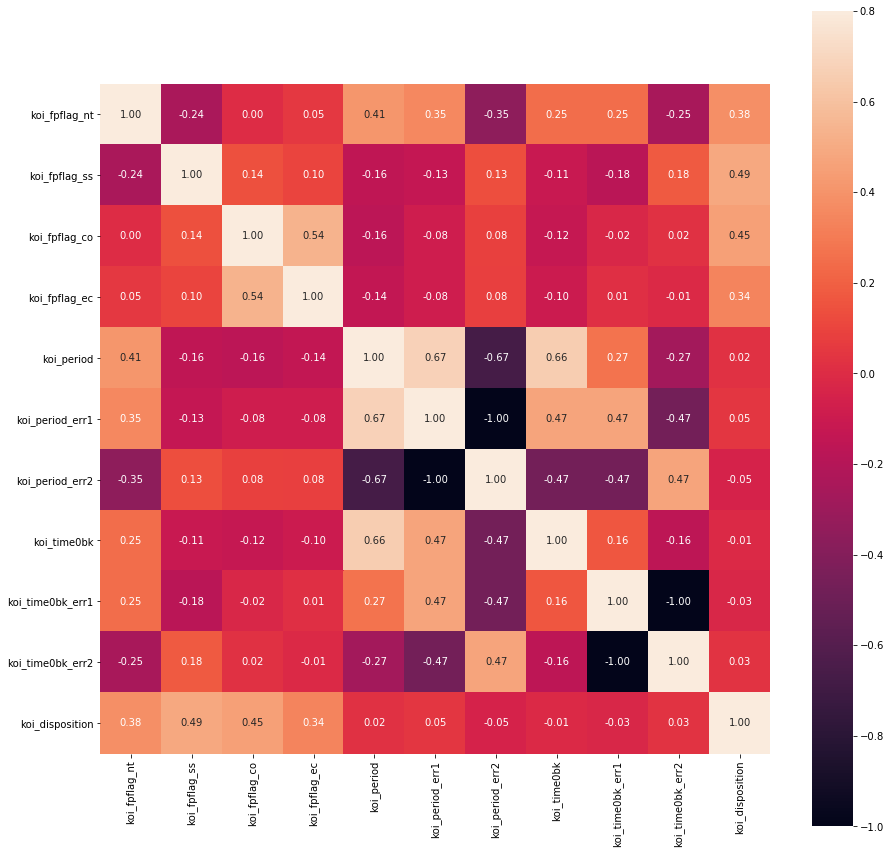

Highest correlation - koi_fpflag_ss = 0.49


In [15]:
corrmat = df_part1.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')
plt.show()
print("Highest correlation - koi_fpflag_ss = 0.49")

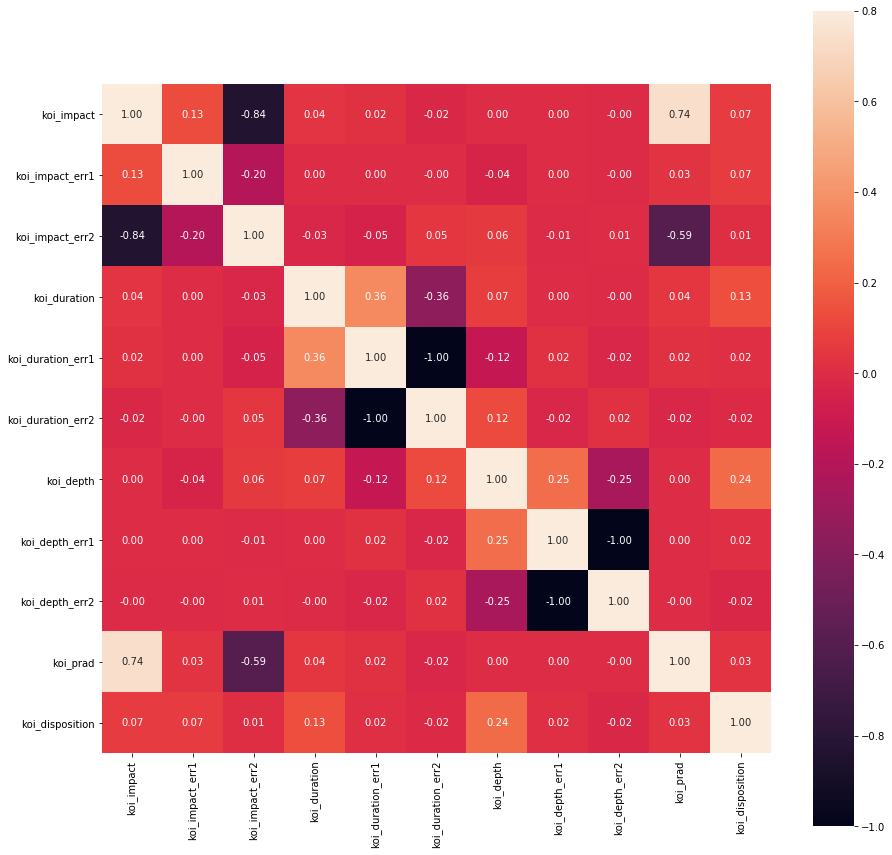

Highest correlation - koi_depth = 0.24


In [16]:
corrmat = df_part2.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')
plt.show()
print("Highest correlation - koi_depth = 0.24")

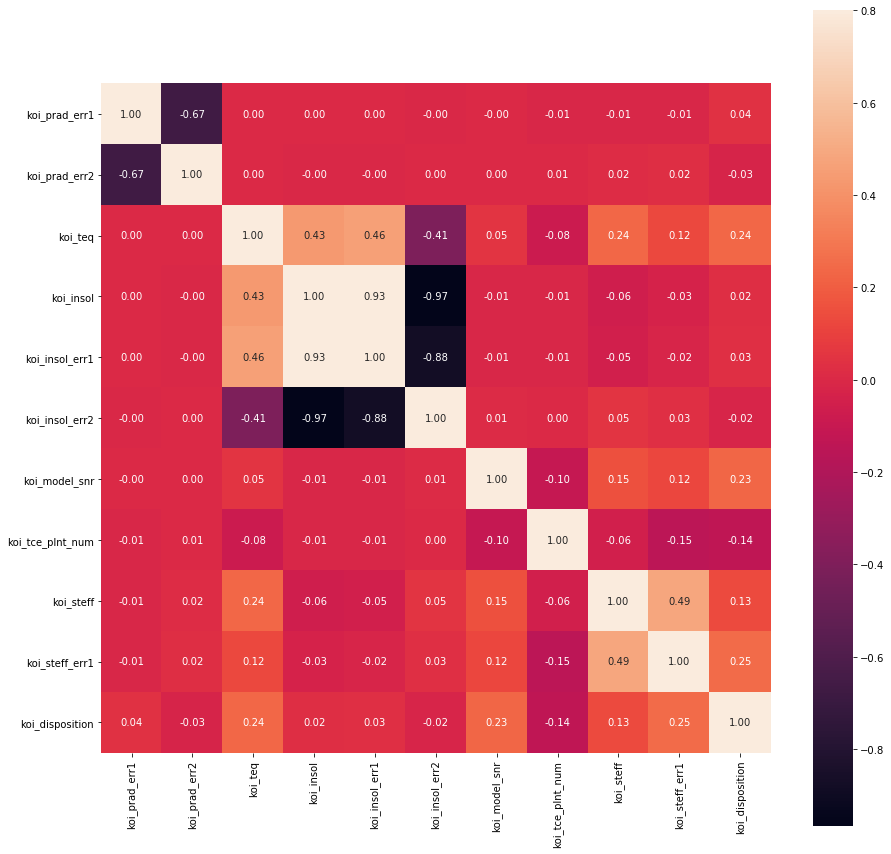

Highest correlation - koi_model_snr = 0.23


In [17]:
corrmat = df_part3.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')
plt.show()
print("Highest correlation - koi_model_snr = 0.23")

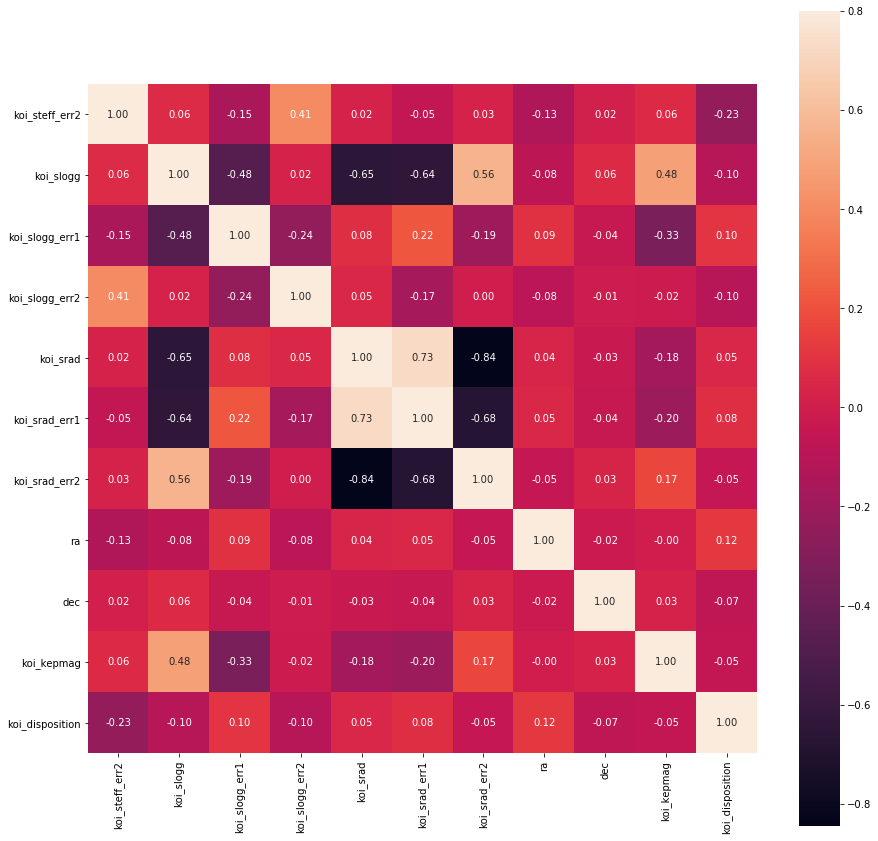

Highest correlation - ra = 0.12


In [33]:
corrmat = df_part4.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')
plt.show()
print("Highest correlation - ra = 0.12")

In [20]:
df_test1 = df[['koi_fpflag_ss','koi_depth','koi_model_snr','ra','koi_disposition']]
df_test1

,koi_fpflag_ss,koi_depth,koi_model_snr,ra,koi_disposition
0,0,874.8,25.8,291.93423,1
1,1,10829.0,76.3,297.00482,2
2,1,8079.2,505.6,285.53461,2
3,0,603.3,40.9,288.75488,1
4,0,686.0,40.2,296.28613,1
...,...,...,...,...,...
6986,0,87.7,8.4,298.74921,2
6987,1,1579.2,453.3,297.18875,2
6988,0,48.5,10.6,286.50937,0
6989,0,103.6,12.3,294.16489,2


### Check which features to use for our model. 

In [21]:
# Watch out for mostly homegeneous features.

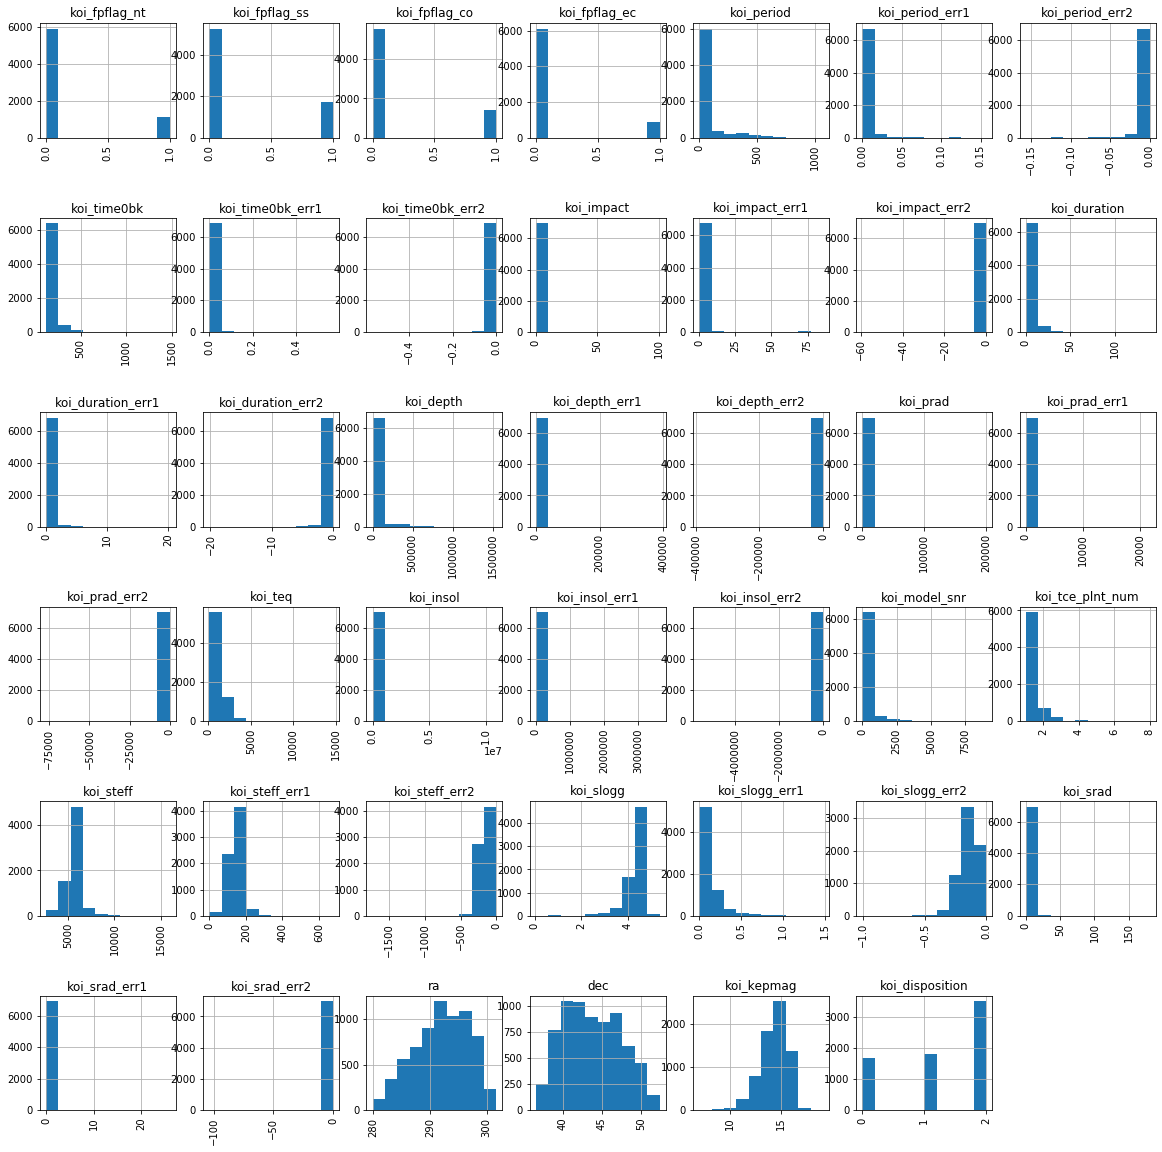

In [34]:
fig = plt.figure(figsize=(20,20))
cols = 7
rows = math.ceil(float(df.shape[1]) / cols)

for i, column in enumerate(['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec',
                'koi_period','koi_period_err1','koi_period_err2','koi_time0bk','koi_time0bk_err1', 
                'koi_time0bk_err2','koi_impact',
                'koi_impact_err1','koi_impact_err2','koi_duration',
                'koi_duration_err1','koi_duration_err2','koi_depth',
                'koi_depth_err1','koi_depth_err2','koi_prad', 
                'koi_prad_err1','koi_prad_err2','koi_teq','koi_insol',
                'koi_insol_err1','koi_insol_err2','koi_model_snr',
                'koi_tce_plnt_num','koi_steff','koi_steff_err1',
                'koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2',
                'koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag',
                'koi_disposition']):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind='bar', axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [35]:
print("Highest correlation - koi_fpflag_ss = 0.49")
print("Highest correlation - koi_depth = 0.24")
print("Highest correlation - koi_model_snr = 0.23")
print("Highest correlation - ra = 0.12")

Highest correlation - koi_fpflag_ss = 0.49
Highest correlation - koi_depth = 0.24
Highest correlation - koi_model_snr = 0.23
Highest correlation - ra = 0.12


## Change koi_disposition column to be a binary 

In [36]:
koi_disp = df['koi_disposition']
koi_disp_binary = []
for i in range(len(koi_disp)):
    if koi_disp[i] == 1:
        koi_disp_binary.append(1)
    else: 
        koi_disp_binary.append(0)
df['koi_binary'] = koi_disp_binary

In [38]:
df_bi_part1 = df[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec',
               'koi_period','koi_period_err1','koi_period_err2','koi_time0bk','koi_time0bk_err1', 
               'koi_time0bk_err2','koi_binary']]
df_bi_part1.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_binary
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,1
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,0
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,1
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,1


In [39]:
df_bi_part2 = df[['koi_impact','koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1','koi_duration_err2',
               'koi_depth','koi_depth_err1','koi_depth_err2','koi_prad','koi_binary']]
df_bi_part2.head()

,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_binary
0,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,1
1,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,0
2,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,0
3,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,1
4,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,1


In [40]:
df_bi_part3 = df[['koi_prad_err1','koi_prad_err2','koi_teq','koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num',
               'koi_steff','koi_steff_err1','koi_binary']]
df_bi_part3.head()

,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_binary
0,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,1
1,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,0
2,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,0
3,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,1
4,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,1


In [41]:
df_bi_part4 = df[['koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad',
               'koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag','koi_binary']]
df_bi_part4.head()

,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_binary
0,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
2,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
3,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1
4,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1


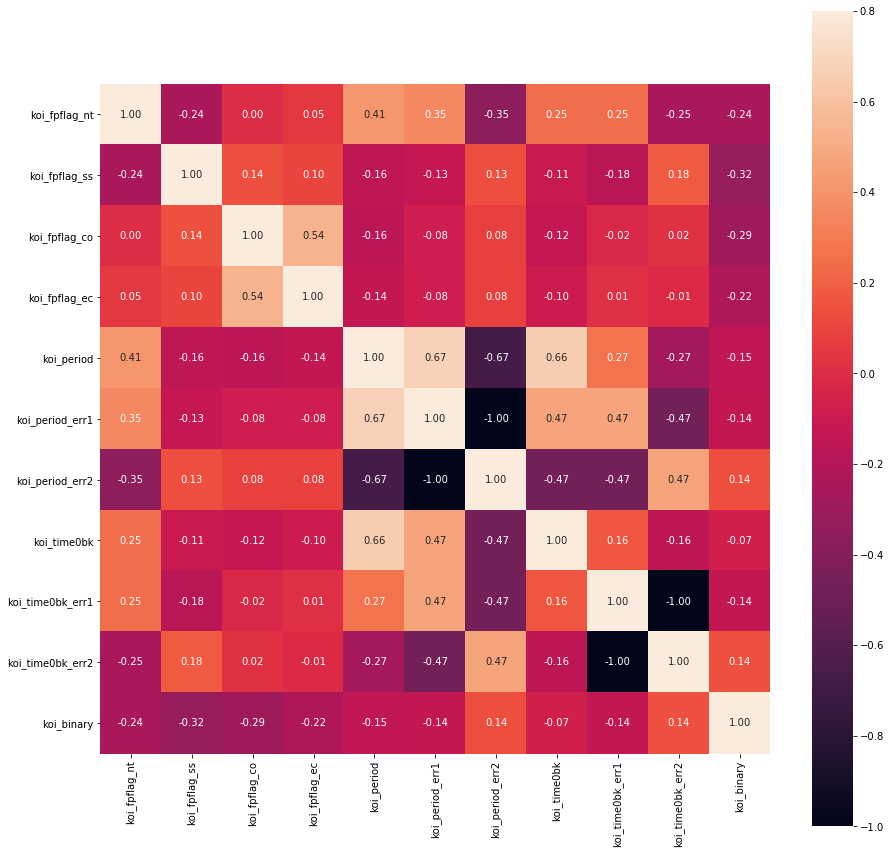

In [52]:
corrmat = df_bi_part1.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')
plt.show()

In [53]:
print("koi_period_err2 = 0.14")
print("koi_time0bk_err2 = 0.14")

koi_period_err2 = 0.14
koi_time0bk_err2 = 0.14


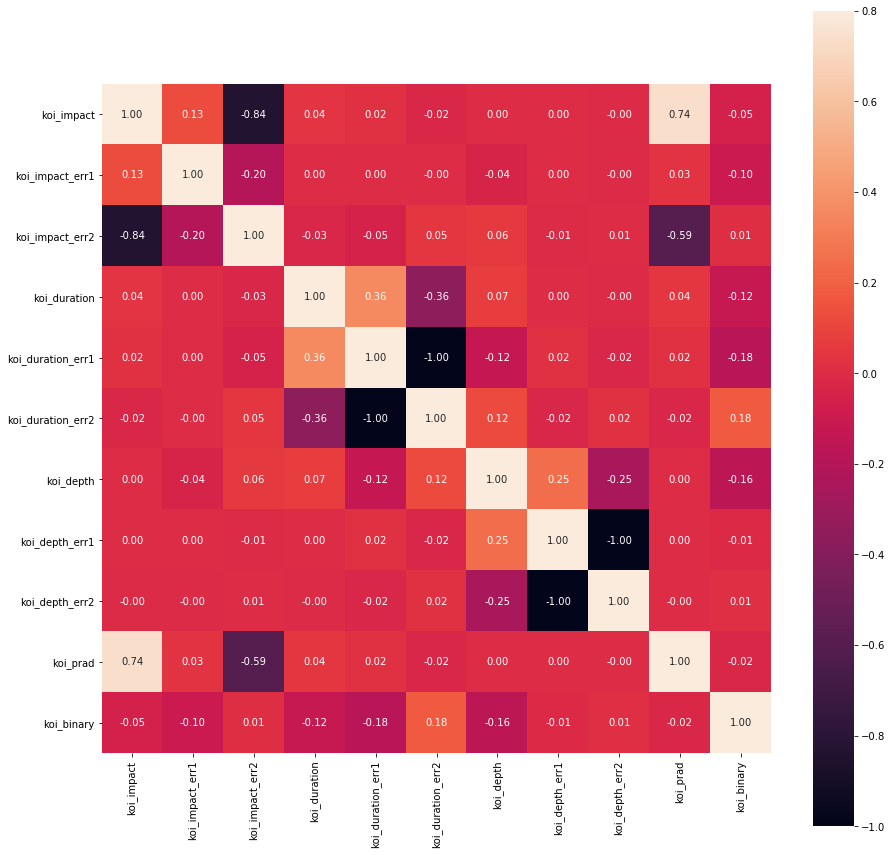

koi_duration_err2 = 0.18


In [47]:
corrmat = df_bi_part2.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')
plt.show()

In [48]:
print("koi_duration_err2 = 0.18")

koi_duration_err2 = 0.18


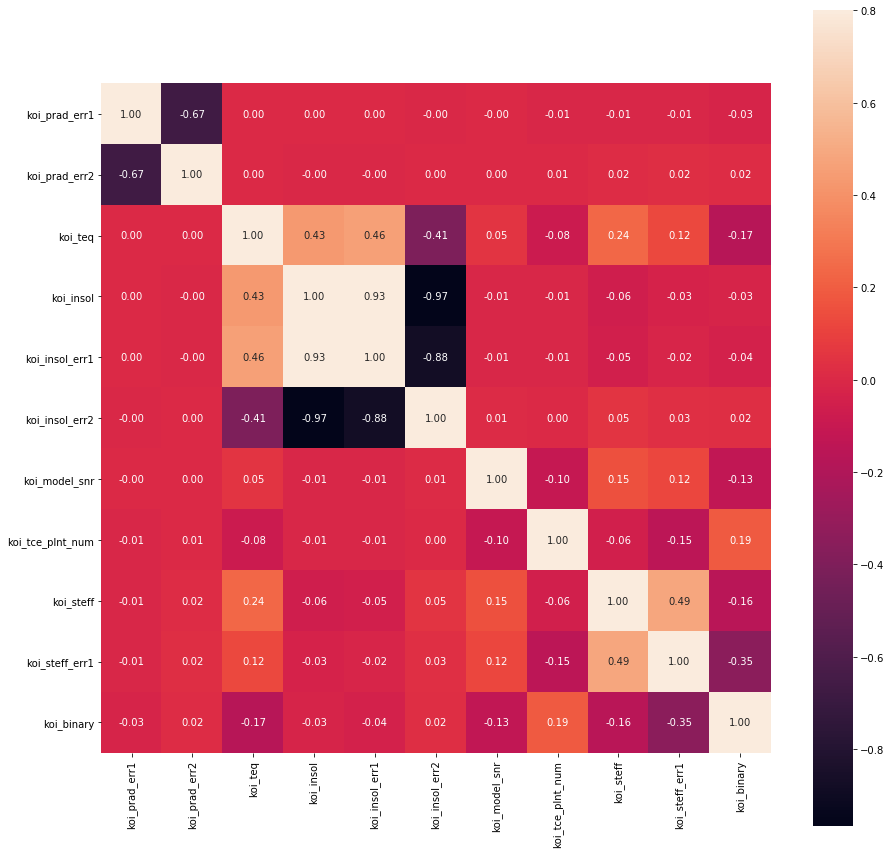

Highest correlation - koi_model_snr = 0.23


In [43]:
corrmat = df_bi_part3.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')
plt.show()

In [49]:
print("koi_tce_plnt_num = 0.19")

koi_tce_plnt_num = 0.19


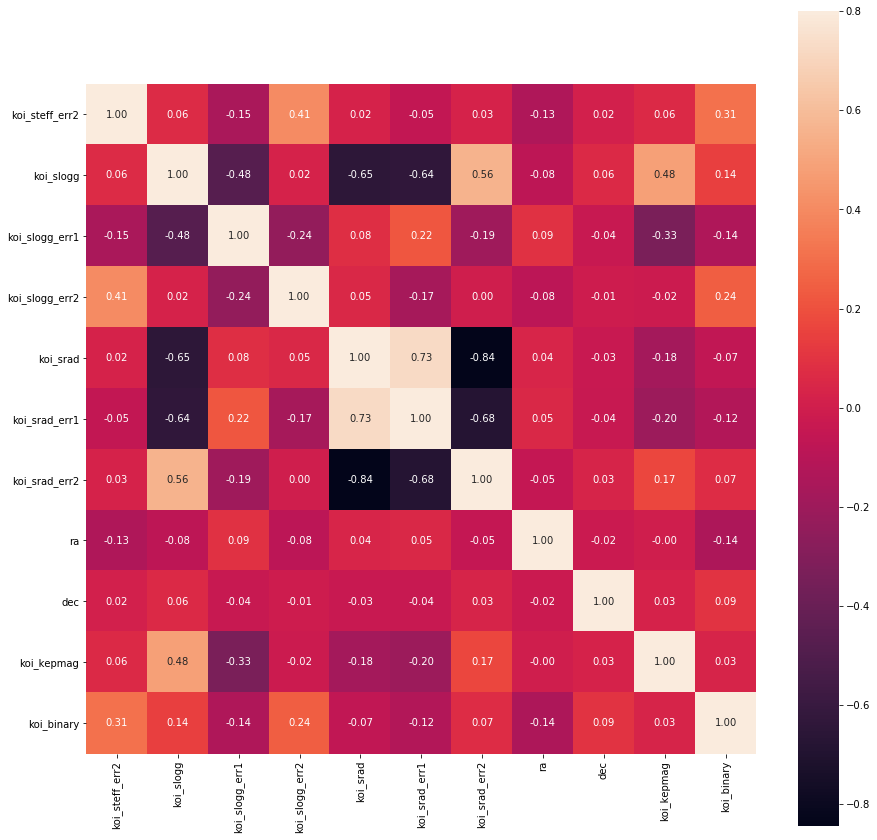

In [50]:
corrmat = df_bi_part4.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f')
plt.show()

In [57]:
print("koi_steff_err2 = 0.31")
print("koi_slog_err2 = 0.24")
print("koi_slogg = 0.14")

koi_steff_err2 = 0.31
koi_slog_err2 = 0.24
koi_slogg = 0.14


In [58]:
print("koi_steff_err2 = 0.31")
print("koi_slog_err2 = 0.24")
print("koi_period_err2 = 0.14")
print("koi_time0bk_err2 = 0.14")
print("koi_duration_err2 = 0.18")
print("koi_tce_plnt_num = 0.19")
print("koi_slogg = 0.14")

koi_steff_err2 = 0.31
koi_slog_err2 = 0.24
koi_period_err2 = 0.14
koi_time0bk_err2 = 0.14
koi_duration_err2 = 0.18
koi_tce_plnt_num = 0.19
koi_slogg = 0.14


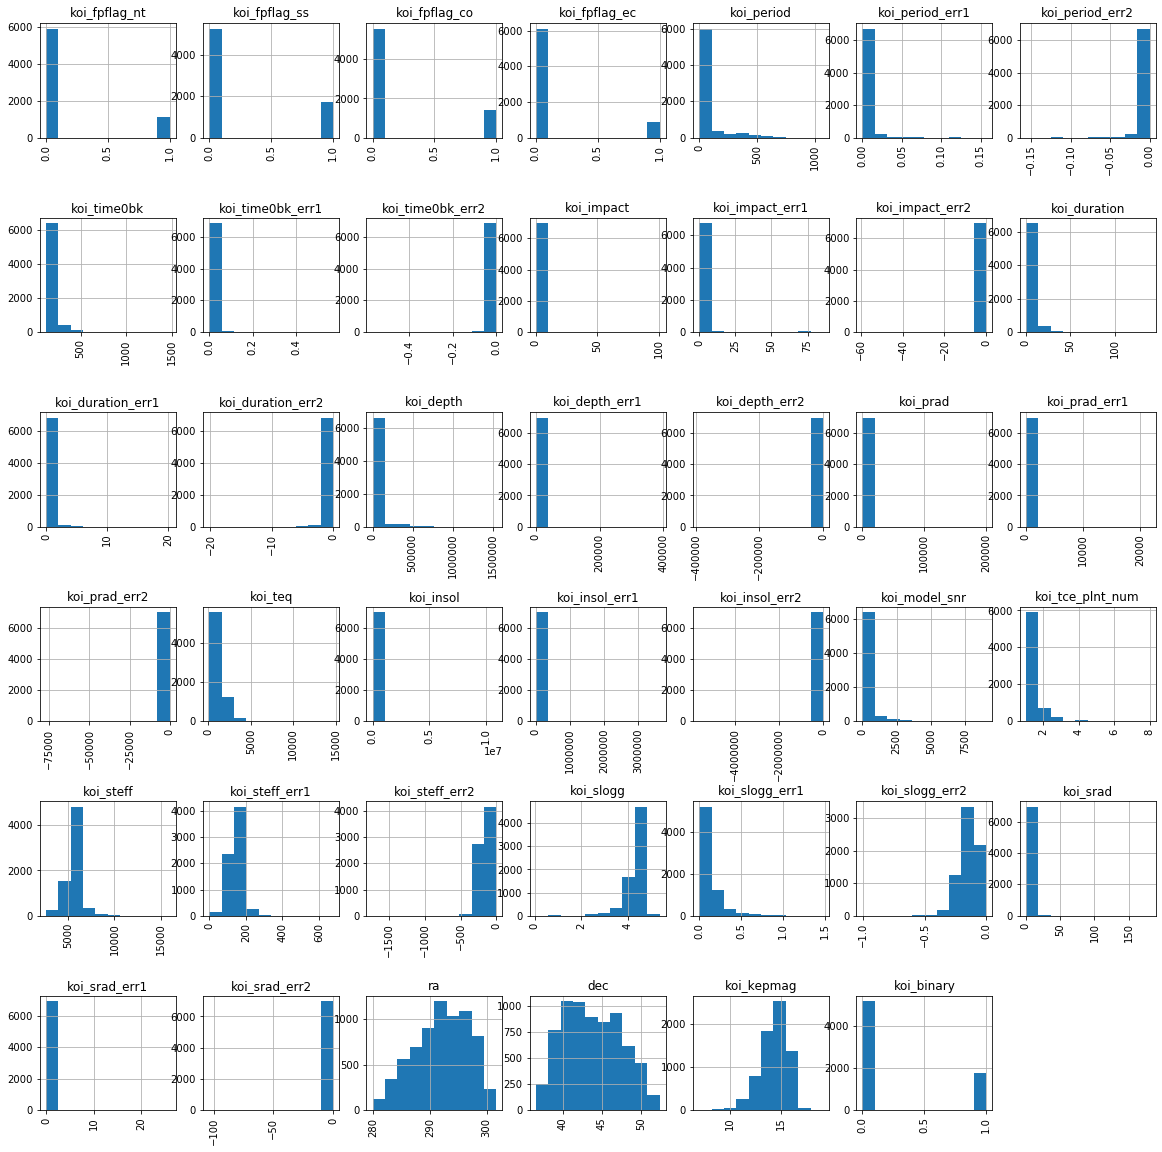

In [37]:
fig = plt.figure(figsize=(20,20))
cols = 7
rows = math.ceil(float(df.shape[1]) / cols)

for i, column in enumerate(['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec',
                'koi_period','koi_period_err1','koi_period_err2','koi_time0bk','koi_time0bk_err1', 
                'koi_time0bk_err2','koi_impact',
                'koi_impact_err1','koi_impact_err2','koi_duration',
                'koi_duration_err1','koi_duration_err2','koi_depth',
                'koi_depth_err1','koi_depth_err2','koi_prad', 
                'koi_prad_err1','koi_prad_err2','koi_teq','koi_insol',
                'koi_insol_err1','koi_insol_err2','koi_model_snr',
                'koi_tce_plnt_num','koi_steff','koi_steff_err1',
                'koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2',
                'koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag',
                'koi_binary']):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == np.object:
        df[column].value_counts().plot(kind='bar', axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

# Select your features (columns)

In [60]:
print("koi_steff_err2 = 0.31")
print("koi_slogg_err2 = 0.24")
print("koi_period_err2 = 0.14")
print("koi_time0bk_err2 = 0.14")
print("koi_duration_err2 = 0.18")
print("koi_tce_plnt_num = 0.19")
print("koi_slogg = 0.14")

koi_steff_err2 = 0.31
koi_slogg_err2 = 0.24
koi_period_err2 = 0.14
koi_time0bk_err2 = 0.14
koi_duration_err2 = 0.18
koi_tce_plnt_num = 0.19
koi_slogg = 0.14


In [62]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_steff_err2', 'koi_slogg_err2', 'koi_period_err2', 'koi_time0bk_err2', 
                        'koi_duration_err2','koi_tce_plnt_num','koi_slogg','koi_binary']]
selected_features

,koi_steff_err2,koi_slogg_err2,koi_period_err2,koi_time0bk_err2,koi_duration_err2,koi_tce_plnt_num,koi_slogg,koi_binary
0,-81,-0.096,-2.479000e-04,-0.003520,-0.11600,2,4.467,1
1,-176,-0.176,-1.490000e-05,-0.000581,-0.03410,1,4.544,0
2,-174,-0.168,-2.630000e-07,-0.000115,-0.00537,1,4.564,0
3,-211,-0.210,-3.760000e-06,-0.001130,-0.04200,1,4.438,1
4,-232,-0.229,-1.050000e-05,-0.001900,-0.06730,2,4.486,1
...,...,...,...,...,...,...,...,...
6986,-152,-0.189,-1.846000e-04,-0.015700,-0.63400,1,4.296,0
6987,-166,-0.196,-1.160000e-07,-0.000170,-0.01740,1,4.529,0
6988,-220,-0.224,-1.780000e-05,-0.007690,-0.22900,1,4.444,0
6989,-236,-0.224,-2.430000e-06,-0.002850,-0.16200,1,4.447,0


# Create a Train Test Split

Use `koi_disposition` for the y values

In [64]:
# Make a copy of the df
feat_df = selected_features

In [ ]:
X = feat_df[['koi_steff_err2', 'koi_slogg_err2', 'koi_period_err2', 'koi_time0bk_err2', 
                        'koi_duration_err2','koi_tce_plnt_num','koi_slogg']]
y = feat_df['koi_binary']

In [ ]:
X_train.head()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [ ]:
# Scale your data

# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)